# Central Limit Theorem illustration

Inspired by Agresti, Statistical Methods for the Social Sciences, 2018, 5th Ed., pg.100. 

An illustration of the central limit theorem. The code repeatedly draws samples (of three different sizes) from a set of underlying population distributions (some of which are very non-normal). A plot is then created showing that the sampling distribution of the mean gets more precise and more normal as the sample size increases, regardless of the (non)normality of the underlying population.

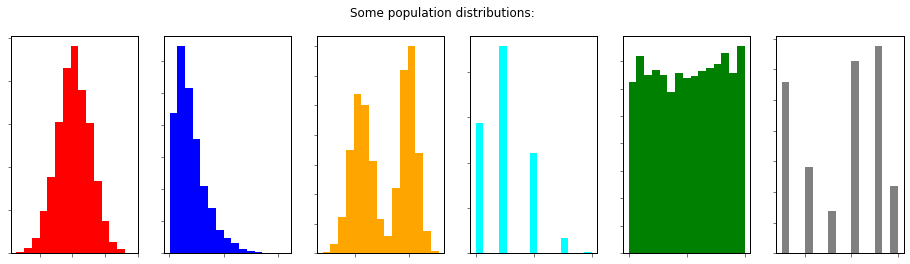

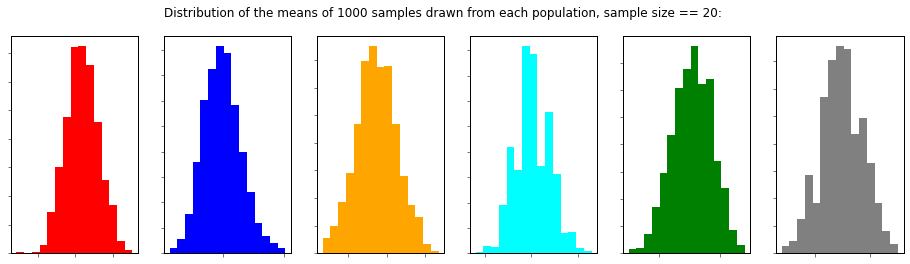

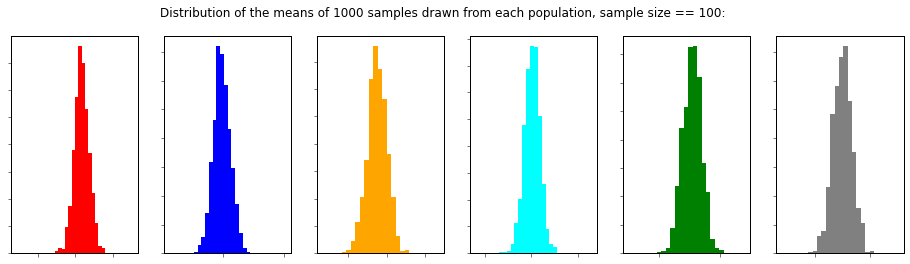

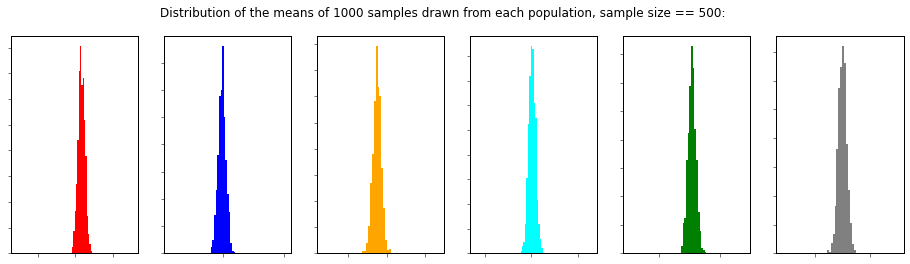

In [2]:
import numpy as np
import numpy.random as npr  
import matplotlib.pyplot as plt

# make plots look like R
plt.style.use('ggplot') 
plt.rc('axes', facecolor='white', edgecolor='black', axisbelow=True, grid=False) 

# set the size of the simulated populations
size = 5000

# randomly generating a set of population distributions, some very non-normal
distributions = [
    npr.normal(1, 10, size=size),
    npr.gamma(2, 1, size=size),
    np.concatenate(
    (npr.normal(1, 2, size=size),
     npr.normal(10, 1.5, size=size))
    ),
    npr.hypergeometric(5, 20, 5, size=size),
    npr.uniform(size=size),
    npr.choice([1,2,3,4,5,6], p = [8/36, 4/36, 2/36, 9/36, 10/36, 3/36], size = size)
]

# set the number of samples to draw, and some different sample sizes
n_iters = 1000
samp_size = 20
samp_size_big = 100
samp_size_bigger = 500

# lists in which to store the distributions of sample means
samp_ds = [] 
samp_ds_big = []
samp_ds_bigger = []

# repeatedly drawing samples of different sizes from each distribution
for dist in distributions:
    # arrays to store the sample means
    samp_d = np.zeros(n_iters)
    samp_d_big = np.zeros(n_iters)
    samp_d_bigger = np.zeros(n_iters)
    for i in np.arange(n_iters):
        # drawing samples of one size
        sample = np.random.choice(dist, size=samp_size)
        samp_d[i] = np.mean(sample)
        # drawing samples of another size, bigger than the first
        sample_big = np.random.choice(dist, size=samp_size_big)
        samp_d_big[i] = np.mean(sample_big)
        # drawing samples of another size, bigger than the others
        sample_bigger = np.random.choice(dist, size=samp_size_bigger)
        samp_d_bigger[i] = np.mean(sample_bigger)
    samp_ds.append(samp_d)
    samp_ds_big.append(samp_d_big)
    samp_ds_bigger.append(samp_d_bigger)
    
# plotting the original population distributions, each next row of the plot is the sampling distribution of the mean
# for samples of a certain size drawn from each population. The x axis of later plots is coerced to be the same length
# as that from earlier plots, to show the increasing precision of the sampling distribution.
fig1, axes1 = plt.subplots(1, 6, figsize = (16, 4))
fig2, axes2 = plt.subplots(1, 6, figsize = (16, 4))
fig3, axes3 = plt.subplots(1, 6, figsize = (16, 4))
fig4, axes4 = plt.subplots(1, 6, figsize = (16, 4))
colors = ['red', 'blue', 'orange', 'cyan', 'green', 'grey']
for ax1, ax2, ax3, ax4, dist, samp_d, samp_d_big, samp_d_bigger, color in zip(
    axes1, axes2, axes3, axes4, distributions, samp_ds, samp_ds_big,  samp_ds_bigger, colors):
    ax1.hist(dist, color=color, bins = 15)
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax2.hist(samp_d, color=color, bins = 15)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax3.hist(samp_d_big, color=color, bins = 15)
    ax3.set_xlim(ax2.get_xlim())
    ax3.set_yticklabels([])
    ax3.set_xticklabels([])
    ax4.hist(samp_d_bigger, color=color, bins = 15)
    ax4.set_xlim(ax2.get_xlim())
    ax4.set_yticklabels([])
    ax4.set_xticklabels([])

# label the plot
fig1.suptitle('Some population distributions:')
fig2.suptitle('Distribution of the means of '
              f'{n_iters} samples drawn from each population, sample size == {samp_size}:')
fig3.suptitle('Distribution of the means of '
              f'{n_iters} samples drawn from each population, sample size == {samp_size_big}:')
fig4.suptitle('Distribution of the means of '
              f'{n_iters} samples drawn from each population, sample size == {samp_size_bigger}:');

***
*by pxr687 (kindly refactored by Matthew Brett).*